In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
behavior_df = pd.read_csv("datasets/QVI_purchase_behaviour.csv")

In [3]:
transaction_df = pd.read_excel("datasets/QVI_transaction_data.xlsx")

## Examine Transaction Data

In [4]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
import datetime as dt

In [8]:
# convert excel style date into datetime format
transaction_df['DATE'] = pd.TimedeltaIndex(transaction_df['DATE'],unit='d') + dt.datetime(1899,12,30)

In [9]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
# check for missing data
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

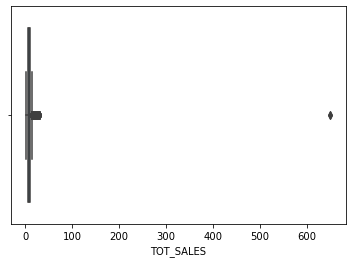

In [11]:
# check for outliers with a boxplot
sns.boxplot(x=transaction_df['TOT_SALES'])

In [12]:
from scipy import stats

In [13]:
# find outliers using z scores

# find the z scores for total_sales
z = np.abs(stats.zscore(transaction_df['TOT_SALES']))
# anything above and below 3 and -3 respectively will be classified as outliers
threshold = 3

# check how many outliers exist for the total sales column
print(len(np.where(z > 3)[0]))

# check dataframe shape (rows and columns)
print(transaction_df.shape)

# remove the outliers
transaction_df = transaction_df[(z<3)]

# check if changes are made
print(transaction_df.shape)

439
(264836, 8)
(264397, 8)


In [14]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_QTY        264397 non-null  int64         
 7   TOT_SALES       264397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [15]:
# extract the 175 g from the prod_name column and place in a new column
prod_size_df = transaction_df['PROD_NAME'].str.extract("(\d+)")

# get the index number of the prod_name column 
prod_name_column_loc = transaction_df.columns.get_loc("PROD_NAME")

# insert at a specific index in the dataframe
transaction_df.insert(prod_name_column_loc+1, "PROD_SIZE", prod_size_df)

In [16]:
# check if changes are made
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8


In [17]:
# change datatype for PROD_NAME
transaction_df['PROD_SIZE'] = pd.to_numeric(transaction_df['PROD_SIZE'])

In [18]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_SIZE       264397 non-null  int64         
 7   PROD_QTY        264397 non-null  int64         
 8   TOT_SALES       264397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 20.2+ MB


In [19]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9


In [20]:
import re

In [21]:
transaction_df.reset_index(drop=True,inplace=True)

In [22]:
for i in range(transaction_df.shape[0]):
    edited_text = re.sub('\d\w*',"",transaction_df['PROD_NAME'][i])
    transaction_df['PROD_NAME'][i] = edited_text

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# save a checkpoint
transactoin_checkpoint1_df = transaction_df

In [24]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8


In [25]:
# drop rows that contain the word "salsa" (not chips)
# some products here are not actually chips

# set all words to lower case before finding the word "salsa"
transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].apply(lambda x: x.lower())

# select only rows that does NOT contain salsa
transaction_df = transaction_df.loc[~transaction_df['PROD_NAME'].str.contains("salsa")]

# change words back to upper case
# transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].apply(lambda x: x.title())


In [26]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,150,3,13.8


In [27]:
# check if data is recorded correctly for each product number
for i in transaction_df['PROD_NBR'].unique():
    unique_value_check = transaction_df.loc[transaction_df['PROD_NBR'] == i]['PROD_NBR'].nunique()
    if unique_value_check != 1:
        print(i)

In [28]:
# check date numbers
transaction_df['DATE'].nunique()
# looks like it's missing a number...

364

In [29]:
# check date range
start_date = transaction_df['DATE'].min()
end_date = transaction_df['DATE'].max()
print(start_date)
print(end_date)

# check for any missing dates
pd.date_range(start = start_date, end = end_date).difference(transaction_df['DATE'])

2018-07-01 00:00:00
2019-06-30 00:00:00


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

December 25 is missing from the dataset but it's also Christmas day so the stores are probably closed

In [30]:
# determine number of stores
transaction_df['STORE_NBR'].nunique()

271

In [31]:
# check number of products
transaction_df['PROD_NBR'].nunique()

105

In [32]:
# check number of different customers
transaction_df['LYLTY_CARD_NBR'].nunique()

71253

In [33]:
# check prod_quantity unique values
transaction_df['PROD_QTY'].unique()

array([2, 3, 5, 1, 4], dtype=int64)

In [34]:
# check max and min values to see if they make sense
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_SIZE,PROD_QTY,TOT_SALES
count,246331.000000,2.463310e+05,2.463310e+05,246331.000000,246331.000000,246331.000000,246331.000000
mean,135.045573,1.355260e+05,1.351258e+05,56.357795,175.541012,1.902148,7.293598
std,76.790799,8.072522e+04,7.815159e+04,33.693425,59.383908,0.325005,2.410614
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.700000
25%,70.000000,7.001400e+04,6.756150e+04,26.000000,150.000000,2.000000,5.800000
50%,130.000000,1.303660e+05,1.351770e+05,53.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030845e+05,2.026565e+05,87.000000,175.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,5.000000,16.500000


In [35]:
# find the product that have the highest sales numbers
transaction_df.groupby(by='PROD_NBR').mean().sort_values(by='TOT_SALES', ascending=False)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_SIZE,PROD_QTY,TOT_SALES
PROD_NBR,,,,,,
4,138.061282,139191.621307,138146.721873,380.0,1.918919,12.266656
14,133.453782,134326.274199,133572.684407,380.0,1.894180,11.175661
20,135.156229,135324.622281,135176.685893,330.0,1.909031,10.881477
7,134.931310,135102.980511,135027.150479,330.0,1.907987,10.875527
16,134.323502,135431.010668,134375.604644,330.0,1.903044,10.847349
...,...,...,...,...,...,...
105,134.209103,134356.603562,134167.830475,190.0,1.894459,3.410026
55,135.064721,135210.847716,135172.942259,90.0,1.894670,3.220939
72,136.957447,137106.179433,136959.118440,175.0,1.890780,3.214326


check for seasonalities with sales

In [36]:
# find any trends
date_group = transaction_df.sort_values(by="DATE").groupby(by='DATE').mean()['TOT_SALES']
date_group.head(3)

DATE
2018-07-01    7.420965
2018-07-02    7.503077
2018-07-03    7.351187
Name: TOT_SALES, dtype: float64

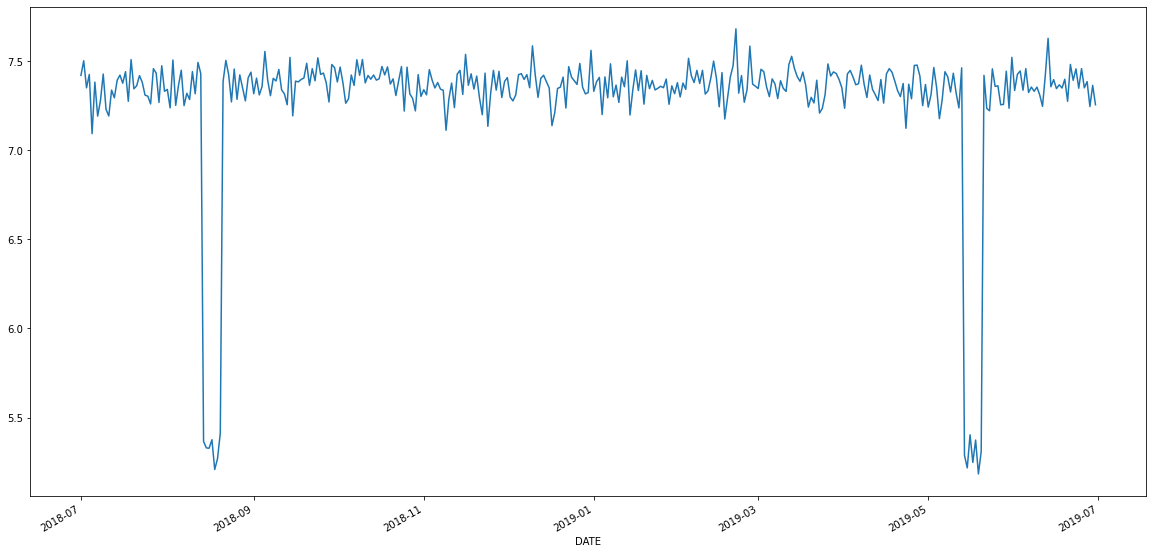

In [37]:
plt.figure(figsize=(20,10))
date_group.plot()
plt.savefig("chip_sales.jpg")

In [38]:
some_df = date_group.reset_index()
some_df.head(3)

,DATE,TOT_SALES
0,2018-07-01,7.420965
1,2018-07-02,7.503077
2,2018-07-03,7.351187


In [39]:
some_df.loc[some_df['DATE'].dt.month==8]

,DATE,TOT_SALES
31,2018-08-01,7.342353
32,2018-08-02,7.238416
33,2018-08-03,7.507251
34,2018-08-04,7.252782
35,2018-08-05,7.364397
36,2018-08-06,7.449858
37,2018-08-07,7.251647
38,2018-08-08,7.320432
39,2018-08-09,7.285736
40,2018-08-10,7.442222


In [40]:
some_df.loc[some_df["DATE"].dt.month==5]

,DATE,TOT_SALES
303,2019-05-01,7.243235
304,2019-05-02,7.311994
305,2019-05-03,7.465449
306,2019-05-04,7.353968
307,2019-05-05,7.178088
308,2019-05-06,7.284300
309,2019-05-07,7.441679
310,2019-05-08,7.413181
311,2019-05-09,7.327695
312,2019-05-10,7.433233


may 14-20 and August 14-20 have ower sales on average compared to other days

#### Graph number of purchases over time

In [41]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,170,2,2.9


In [42]:
# group by date and look at count (number of purchases)
purchase_count = transaction_df.sort_values(by='DATE', ascending=True)\
                            .groupby(by='DATE')\
                            .count()['STORE_NBR']

In [43]:
purchase_count

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: STORE_NBR, Length: 364, dtype: int64

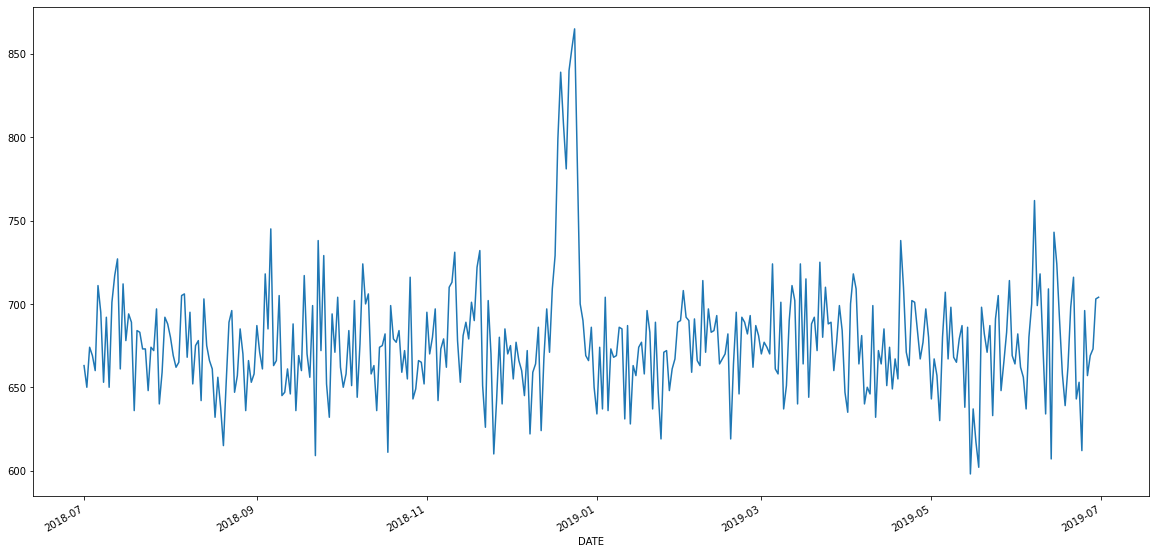

In [44]:
plt.figure(figsize=(20,10))
purchase_count.plot()

(736999.0, 737091.0)

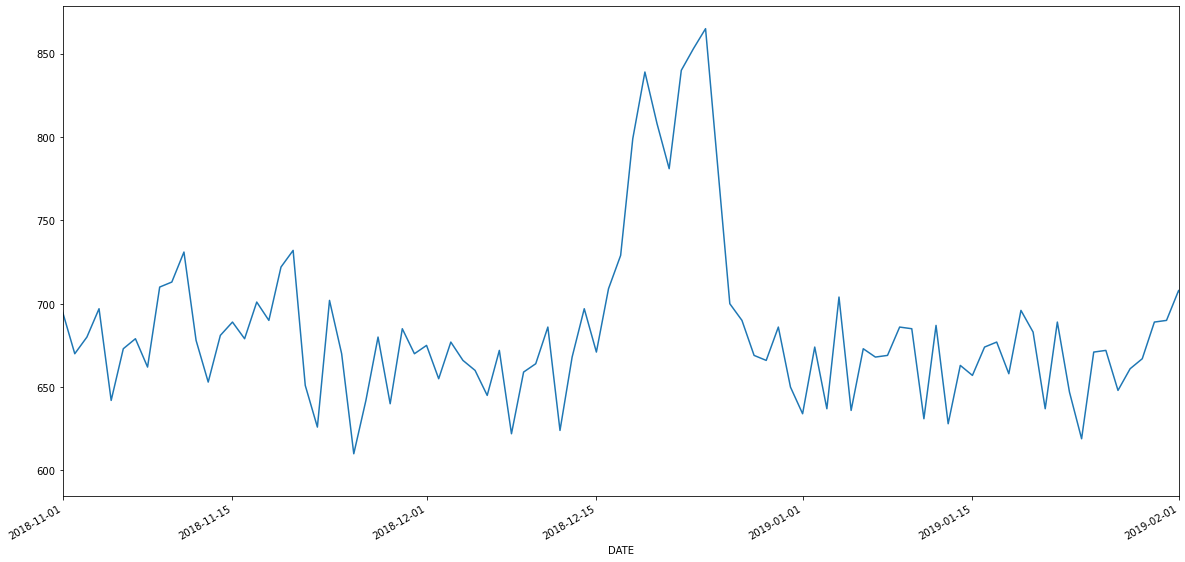

In [45]:
plt.figure(figsize=(20,10))
purchase_count.plot()
plt.xlim(["2018-11-01", "2019-02-01"])

In [46]:
purchase_count_df = pd.DataFrame(purchase_count)

In [47]:
purchase_count_df["2018-12-01":"2019-01-15"]


,STORE_NBR
DATE,
2018-12-01,675
2018-12-02,655
2018-12-03,677
2018-12-04,666
2018-12-05,660
2018-12-06,645
2018-12-07,672
2018-12-08,622
2018-12-09,659


we can see a surge in number of purchases from December 17 to December 24. This surge could be explained by Christmas where customers want to do some last minute shopping or want to shop before the stores close on the 25th.

In [48]:
transaction_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3


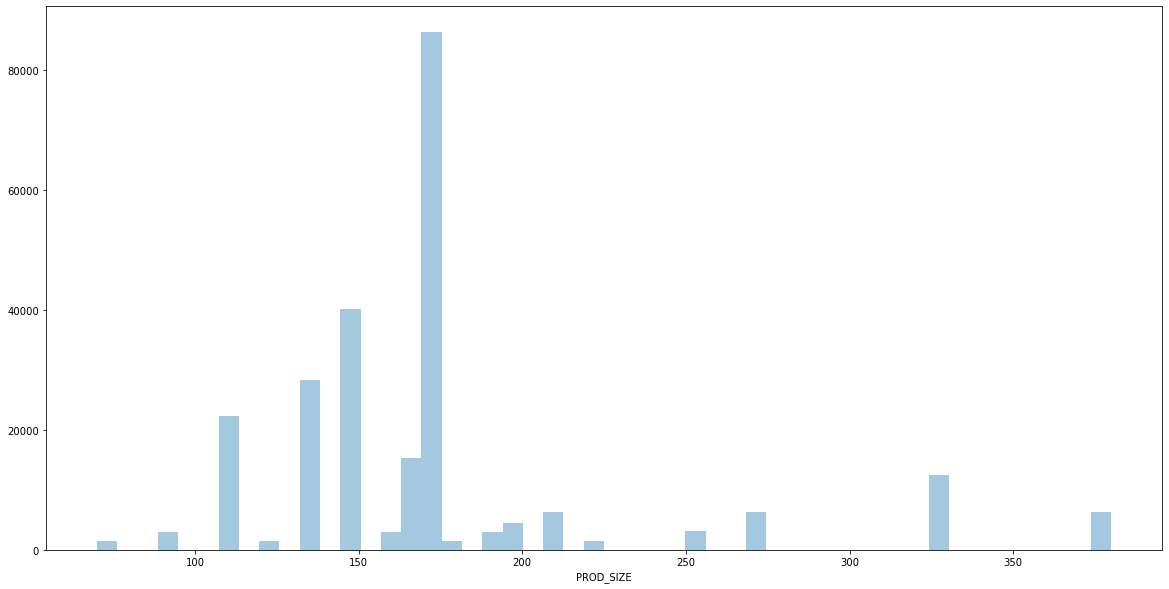

In [49]:
plt.figure(figsize=(20,10))
sns.distplot(transaction_df['PROD_SIZE'],kde=False)

#### Filter out the brands of the chips. 
Brand names are just the first words in PROD_NAME

In [50]:
transaction_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3


In [57]:
# forgot to do this earlier when we dropped the rows
transaction_df.reset_index(inplace=True)

In [58]:
brand_names = []
for i in range(transaction_df.shape[0]):
    brand_names.append(transaction_df['PROD_NAME'][i].split()[0])
    

In [60]:
# get the index number of the column:"PROD_NAME"
prod_name_column_loc = transaction_df.columns.get_loc("PROD_NAME")
print(prod_name_column_loc)

transaction_df.insert(prod_name_column_loc + 1, "BRAND_NAME", brand_names)

6


In [62]:
# check if changes are made
transaction_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3
2,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9
3,3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,smiths,175,5,15.0
4,4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,kettle,150,3,13.8


In [69]:
transaction_df['BRAND_NAME'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'french', 'rrd', 'tostitos', 'cheetos',
       'woolworths', 'snbts', 'sunbites'], dtype=object)

Brand names have inconsistent naming conventions...
* ncc and natural
* smith and smiths
* grain, grnwves and grainwaves
* ww and woolworths
* red, rrd and red rock deli
* 'infzns' and 'infuzions'
* 'snbts' and 'sunbites'
* 'smiths' and 'smith'
* 'doritos' and 'dorito'

In [70]:
# rename brand names for consistency
transaction_df['BRAND_NAME'].replace("ncc", "natural", inplace=True)
transaction_df['BRAND_NAME'].replace("smith", "smiths", inplace=True)
transaction_df['BRAND_NAME'].replace(['grain','grnwves'], "grainwaves", inplace=True)
transaction_df['BRAND_NAME'].replace("ww", "woolworths", inplace=True)
transaction_df['BRAND_NAME'].replace(["red",'rrd'], "red rock deli", inplace=True)
transaction_df['BRAND_NAME'].replace("infzns", "infuzions", inplace=True)
transaction_df['BRAND_NAME'].replace("snbts", "sunbites", inplace=True)
transaction_df['BRAND_NAME'].replace('dorito', "doritos", inplace=True)

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
# check if changes are made
transaction_df['BRAND_NAME'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grainwaves', 'doritos',
       'twisties', 'woolworths', 'thins', 'burger', 'cheezels',
       'infuzions', 'red rock deli', 'pringles', 'tyrrells', 'cobs',
       'french', 'tostitos', 'cheetos', 'sunbites'], dtype=object)

Check which brand had the most sales and purchases:


In [72]:
transaction_df.head(2)

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3


In [76]:
brand_group = transaction_df.groupby(by='BRAND_NAME')

In [82]:
brand_group.sum().sort_values(by='TOT_SALES', ascending=False)['TOT_SALES']

BRAND_NAME
kettle           387471.2
doritos          225099.3
smiths           216535.9
pringles         176730.5
infuzions         98743.6
thins             88852.5
red rock deli     87607.5
twisties          80828.4
tostitos          79239.6
cobs              70284.8
grainwaves        51491.2
tyrrells          51387.0
natural           42318.0
woolworths        41059.1
cheezels          39591.0
ccs               18078.9
cheetos           16884.5
sunbites           9676.4
french             7929.0
burger             6831.0
Name: TOT_SALES, dtype: float64

In [83]:
brand_group.count().sort_values(by='TOT_SALES',ascending=False)['TOT_SALES']

BRAND_NAME
kettle           41166
smiths           30311
doritos          25163
pringles         25052
red rock deli    16321
infuzions        14185
thins            14075
woolworths       11836
cobs              9678
tostitos          9443
twisties          9420
grainwaves        7733
natural           7469
tyrrells          6428
cheezels          4583
ccs               4551
sunbites          3008
cheetos           2927
burger            1564
french            1418
Name: TOT_SALES, dtype: int64

Kettle have the highest purchases numbers and sales. Smiths have the third highest sales numbers but second highest in purchase counts so their profit margin could be higher than Doritos

## Examine Customer Data


**Lifestage**: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

**Premium_customer:** Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [84]:
# check for null values
behavior_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [89]:
# check min max values. format to remove scientific notation
round(behavior_df.describe(),3)

,LYLTY_CARD_NBR
count,72637.000
mean,136185.932
std,89892.932
min,1000.000
25%,66202.000
50%,134040.000
75%,203375.000
max,2373711.000


In [85]:
behavior_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [94]:
# check number of unique values for each feature
behavior_df.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [95]:
# check the different unique values for the lifestage feature
behavior_df['LIFESTAGE'].unique()


array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

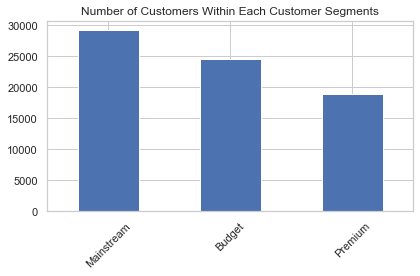

In [477]:
# check premium customer distribution
behavior_df['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar')

# set customer behavior chart title
plt.title("Number of Customers Within Each Customer Segments")

# set x labels orientation
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("static/analysis_pics/customer_bahavior.png")

## Merge transaction_df and behavior_df

In [102]:
transaction_df.shape

(246331, 11)

In [282]:
# merge two dataframes
complete_df = pd.merge(transaction_df, behavior_df, on="LYLTY_CARD_NBR", how='inner')
complete_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,203,2019-03-09,1,1307,347,54,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [104]:
complete_df.shape

(246331, 13)

In [105]:
# check for missing values
complete_df.isnull().sum()

index               0
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
BRAND_NAME          0
PROD_SIZE           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Data Analysis

Analysis metrics to consider:
* who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behavior is
* how many customers are in each segment
* how many chips are bought per customer by segment
* what's the average chip price by customer segment

In [106]:
complete_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,203,2019-03-09,1,1307,347,54,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#### Find out which customer segment spends the most on chips

In [468]:
"Find out which customer segment spends the most on chips".title()

'Find Out Which Customer Segment Spends The Most On Chips'

In [114]:
# who spends the most on chips
sales_sorted = complete_df.groupby("LYLTY_CARD_NBR").sum().sort_values('TOT_SALES', ascending=False)['TOT_SALES']
sales_sorted.head(6)

LYLTY_CARD_NBR
230078    138.6
58361     124.8
63197     122.6
162039    121.6
179228    120.8
199157    118.8
Name: TOT_SALES, dtype: float64

In [115]:
complete_df.nunique()

index               246331
DATE                   364
STORE_NBR              271
LYLTY_CARD_NBR       71253
TXN_ID              244848
PROD_NBR               105
PROD_NAME              105
BRAND_NAME              20
PROD_SIZE               20
PROD_QTY                 5
TOT_SALES               84
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

In [119]:
# group by life stage and purchasing behavior
premium_lifestage_group_df = pd.DataFrame(complete_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()['TOT_SALES'])

In [132]:
lifestyle_df = premium_lifestage_group_df.sort_values("TOT_SALES", ascending=False).reset_index()

In [133]:
lifestyle_df.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES
0,Budget,OLDER FAMILIES,155980.95
1,Mainstream,YOUNG SINGLES/COUPLES,147001.90
2,Mainstream,RETIREES,144686.45
3,Budget,YOUNG FAMILIES,129129.25
4,Budget,OLDER SINGLES/COUPLES,127114.00


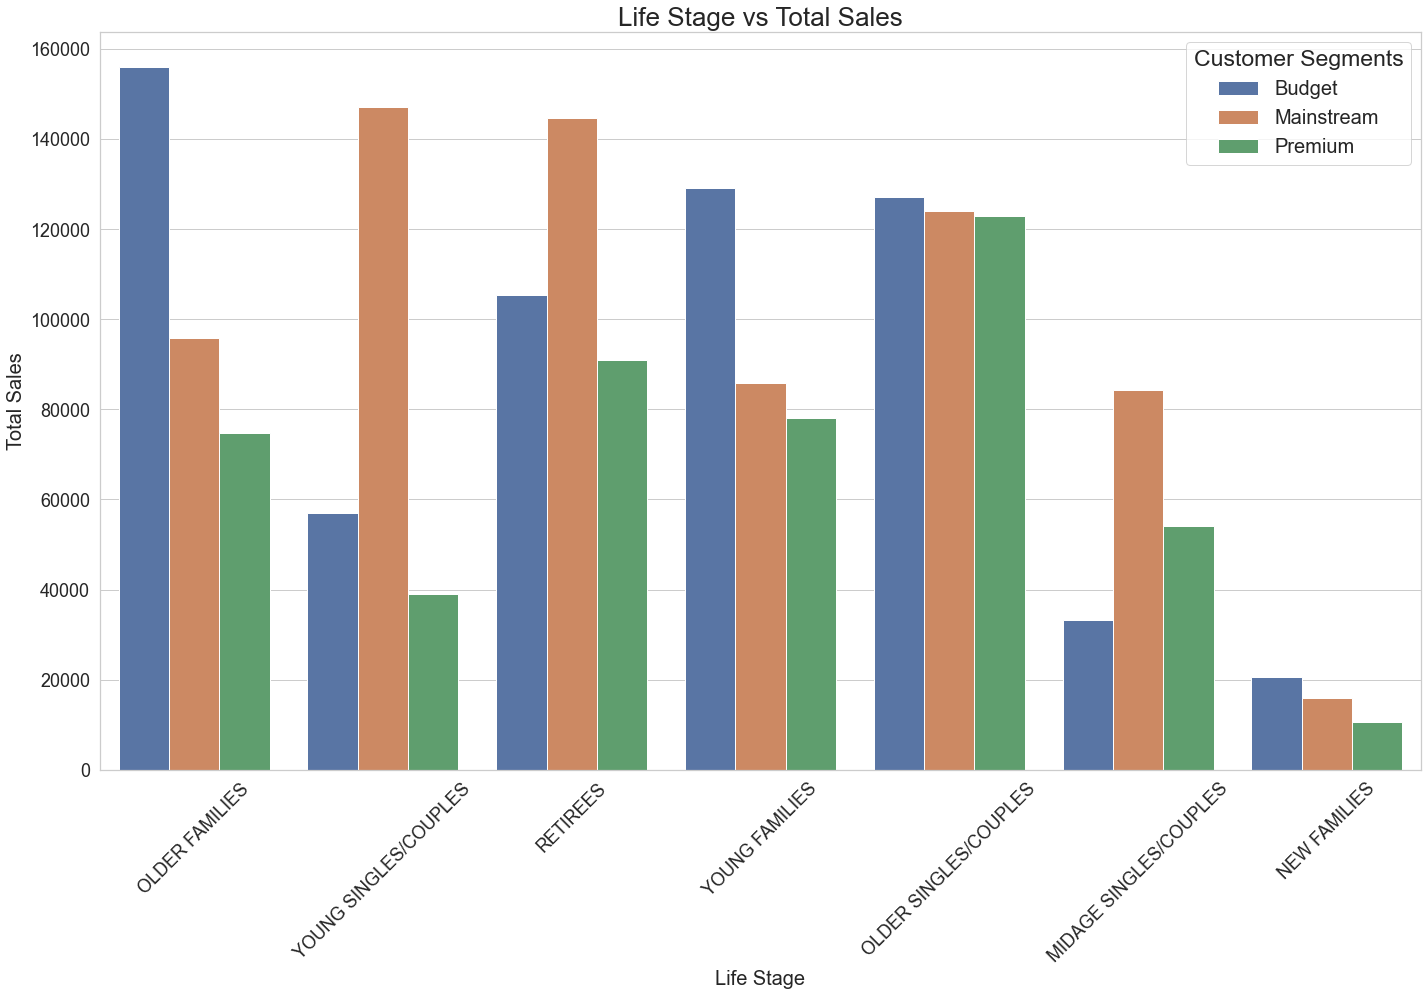

In [470]:
sns.set(style="whitegrid")
# set figure size
plt.figure(figsize=(20,14))

# create bar chart
sns.barplot(x = "LIFESTAGE",
           y = "TOT_SALES",
           hue= "PREMIUM_CUSTOMER",
           data = lifestyle_df)
# set x labels orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Life Stage", fontsize= 20)
plt.ylabel("Total Sales", fontsize=20)
plt.title("Life Stage vs Total Sales", fontsize=26)
plt.tick_params(labelsize=18)

plt.legend(title = "Customer Segments",
          loc='best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

# save file
plt.savefig("static/analysis_pics/Lifestage_vs_totalsales.png")

Sales are mainly coming from Budget for OLDER FAMILIES, Mainstream for YOUNG SINGLES/COUPLES and Mainstream for RETIREES

Now check to see if the higher sales are due to there being more customers who buy chips

#### check how many customers from each customer segment bought chips


In [154]:
customercount_group_df = complete_df.groupby(['PREMIUM_CUSTOMER', "LIFESTAGE"]).count()['LYLTY_CARD_NBR'].reset_index()

In [155]:
customercount_group_df

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR
0,Budget,MIDAGE SINGLES/COUPLES,4684
1,Budget,NEW FAMILIES,2822
2,Budget,OLDER FAMILIES,21472
3,Budget,OLDER SINGLES/COUPLES,17137
4,Budget,RETIREES,14197
5,Budget,YOUNG FAMILIES,17735
6,Budget,YOUNG SINGLES/COUPLES,8566
7,Mainstream,MIDAGE SINGLES/COUPLES,11073
8,Mainstream,NEW FAMILIES,2183
9,Mainstream,OLDER FAMILIES,13214


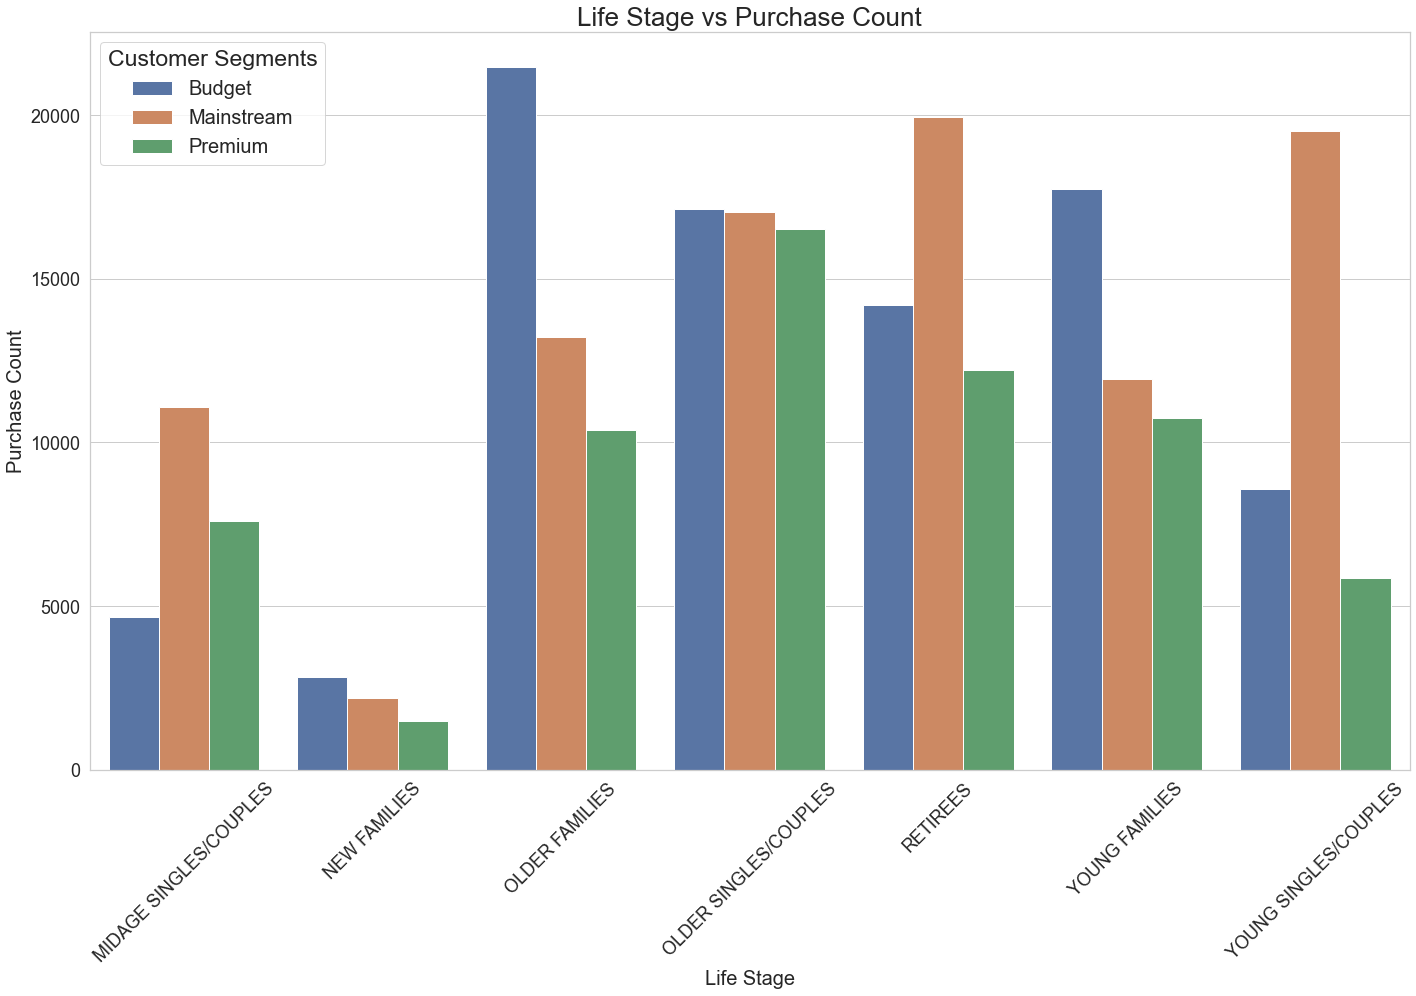

In [471]:
sns.set(style="whitegrid")
# set figure size
plt.figure(figsize=(20,14))

# create bar chart
sns.barplot(x = "LIFESTAGE",
           y = "LYLTY_CARD_NBR",
           hue= "PREMIUM_CUSTOMER",
           data = customercount_group_df)
# set x labels orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Life Stage", fontsize= 20)
plt.ylabel("Purchase Count", fontsize=20)
plt.title("Life Stage vs Purchase Count", fontsize=26)
plt.tick_params(labelsize=18)

plt.legend(title = "Customer Segments",
          loc='best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

# save file
plt.savefig("static/analysis_pics/Lifestage_vs_purchasecount.png")

There are more Mainstream customers in "Young singles/couples" and "retirees" who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget customer segment for the "Older Families" segment. 

Higher sales may be driven by more units of chips being bought per customer

#### calculate the number of units of chips bought per customer

In [172]:
# find how many customers are in each segment
num_customer_per_segment = complete_df.groupby(['PREMIUM_CUSTOMER', "LIFESTAGE"]).nunique()['LYLTY_CARD_NBR'].values

In [174]:
customercount_group_df['num_customers'] = num_customer_per_segment

In [177]:
customercount_group_df.head(3)

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR,num_customers
0,Budget,MIDAGE SINGLES/COUPLES,4684,1474
1,Budget,NEW FAMILIES,2822,1087
2,Budget,OLDER FAMILIES,21472,4607


In [178]:
# create a variable for total number of chips bought
chips_purchased = customercount_group_df['LYLTY_CARD_NBR']

# create a varialbe for total number of customers for each segment
customers_per_segment = customercount_group_df['num_customers']

# calculate number of chips bought per customer
customercount_group_df['num_bought_percustomer'] = chips_purchased / customers_per_segment

In [179]:
customercount_group_df.head(3)

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR,num_customers,num_bought_percustomer
0,Budget,MIDAGE SINGLES/COUPLES,4684,1474,3.177748
1,Budget,NEW FAMILIES,2822,1087,2.596136
2,Budget,OLDER FAMILIES,21472,4607,4.660734


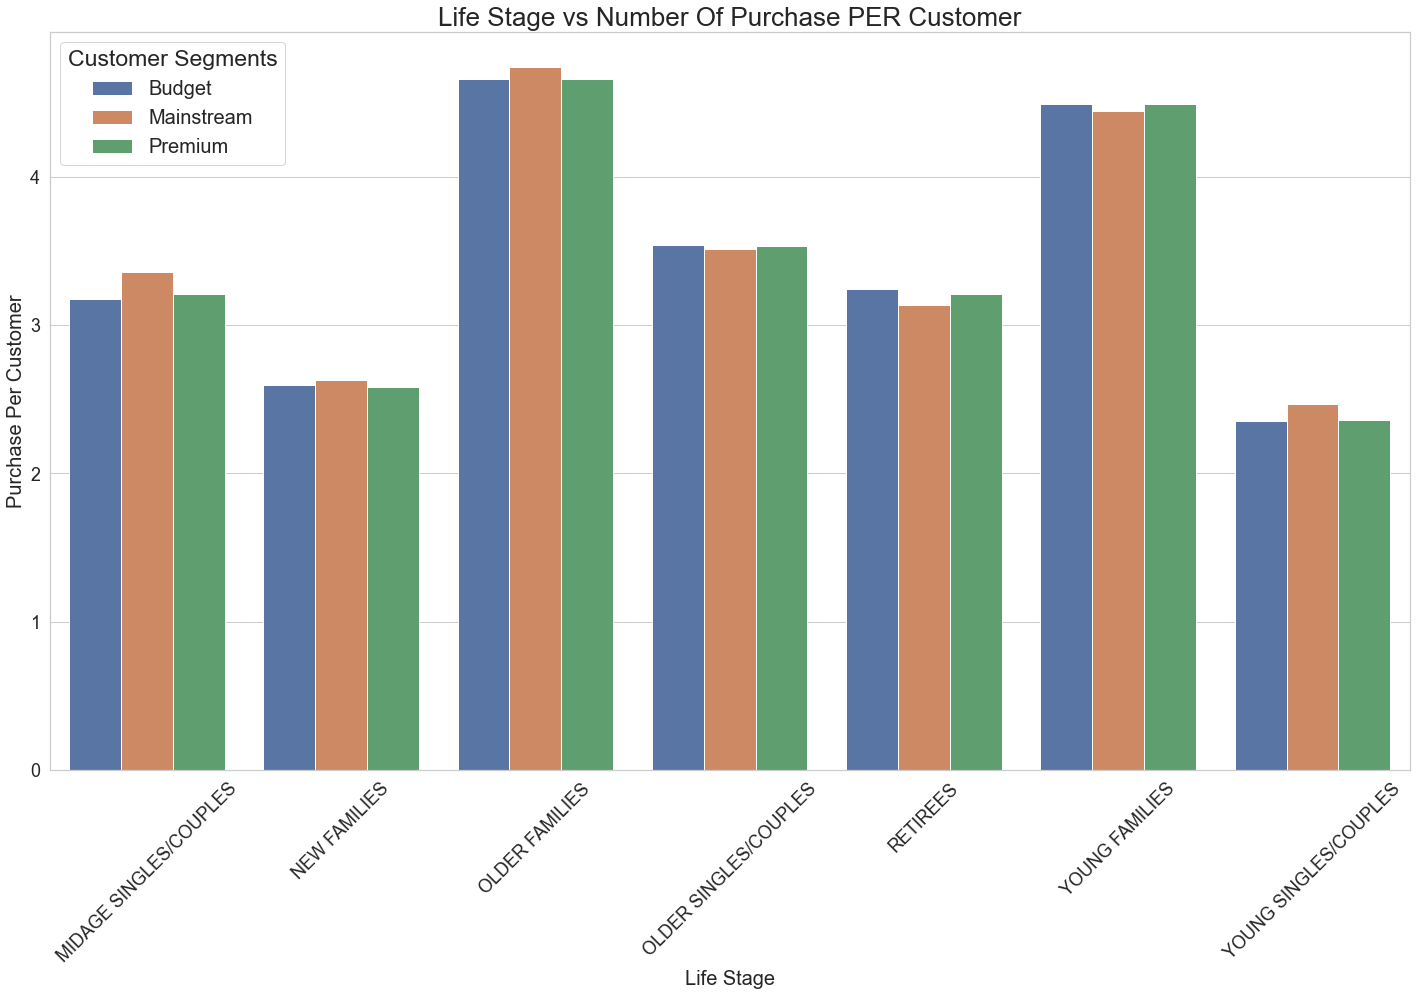

In [472]:
sns.set(style="whitegrid")
# set figure size
plt.figure(figsize=(20,14))

# create bar chart
sns.barplot(x = "LIFESTAGE",
           y = "num_bought_percustomer",
           hue= "PREMIUM_CUSTOMER",
           data = customercount_group_df)
# set x labels orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Life Stage", fontsize= 20)
plt.ylabel("Purchase Per Customer", fontsize=20)
plt.title("Life Stage vs Number Of Purchase PER Customer", fontsize=26)
plt.tick_params(labelsize=18)

plt.legend(title = "Customer Segments",
          loc='best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

# save file
plt.savefig("static/analysis_pics/Lifestage_vs_purchasePerCustomer.png")

older families and young families in general buy more chips per customer

#### Find the average price per unit chips bought for each customer

In [185]:
average_price_per_unit = complete_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean()['TOT_SALES']

In [186]:
average_price_per_unit.values

array([7.08845004, 7.28470943, 7.26438851, 7.41751765, 7.41999718,
       7.28104032, 6.6518912 , 7.60902646, 7.30082455, 7.25345467,
       7.28063417, 7.25390805, 7.20418798, 7.53276454, 7.13230071,
       7.2141319 , 7.20638605, 7.4348769 , 7.43932313, 7.26092734,
       6.66674645])

In [189]:
customercount_group_df['price_per_unit'] = average_price_per_unit.values

In [191]:
customercount_group_df.head()

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR,num_customers,num_bought_percustomer,price_per_unit
0,Budget,MIDAGE SINGLES/COUPLES,4684,1474,3.177748,7.088450
1,Budget,NEW FAMILIES,2822,1087,2.596136,7.284709
2,Budget,OLDER FAMILIES,21472,4607,4.660734,7.264389
3,Budget,OLDER SINGLES/COUPLES,17137,4847,3.535589,7.417518
4,Budget,RETIREES,14197,4383,3.239106,7.419997


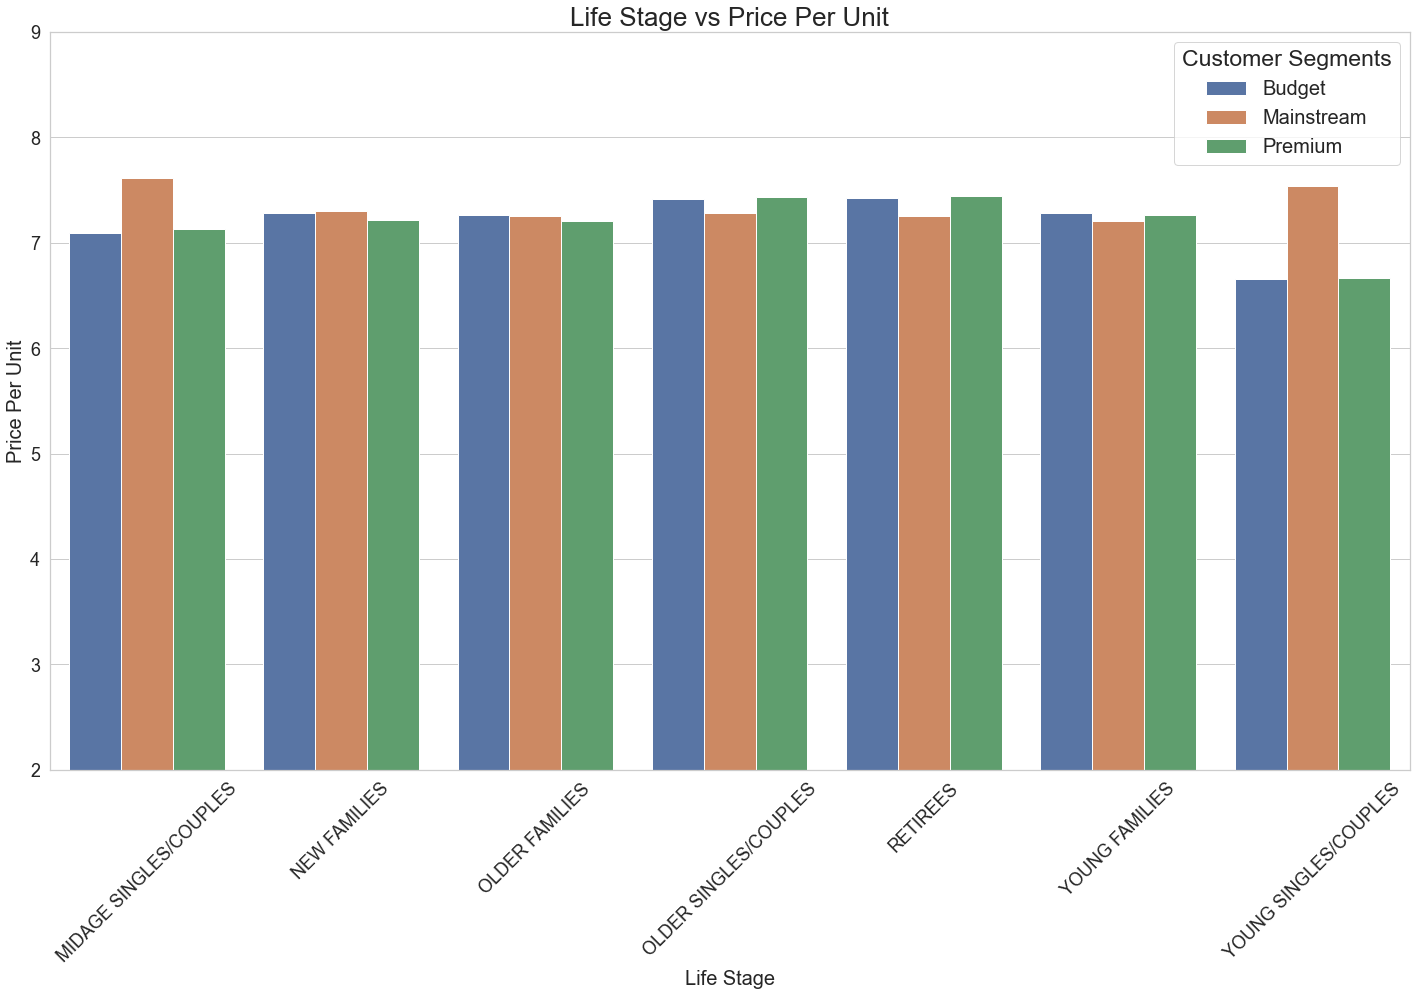

In [473]:
sns.set(style="whitegrid")
# set figure size
plt.figure(figsize=(20,14))

# create bar chart
sns.barplot(x = "LIFESTAGE",
           y = "price_per_unit",
           hue= "PREMIUM_CUSTOMER",
           data = customercount_group_df)
# set x labels orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Life Stage", fontsize= 20)
plt.ylabel("price per unit".title(), fontsize=20)
plt.title("Life Stage vs Price Per Unit", fontsize=26)
plt.tick_params(labelsize=18)

plt.legend(title = "Customer Segments",
          loc='best',
          fontsize=20,
          title_fontsize=23)
plt.ylim(2,9)

plt.tight_layout()

# save file
plt.savefig("static/analysis_pics/Lifestage_vs_pricePerUnit.png")

* Young and midage singles and couples: mainstream customers are more willing to pay more per unit compared to their budget and premium counterparts. 

The difference in average price per unit isn't large so we can check if this difference is statisically different

#### t-test between mainstream vs premium and budget for mid age and young singles/couples

In [196]:
from scipy.stats import ttest_ind

In [223]:
complete_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,203,2019-03-09,1,1307,347,54,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [224]:
# create a duplicate of complete_df for this specific analysis
for_ttest_df = complete_df

In [225]:
for_ttest_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,203,2019-03-09,1,1307,347,54,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [226]:
# calculate price per unit and create a column named "priced_per_unit"
for_ttest_df['price_per_unit'] = for_ttest_df['TOT_SALES'] / for_ttest_df['PROD_QTY']

In [227]:
for_ttest_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,price_per_unit
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2.10
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1.90
3,203,2019-03-09,1,1307,347,54,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1.45


In [228]:
for_ttest_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [229]:
for_ttest_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [234]:
# select the price per unit for mainstream customers
mainstream_ppu = for_ttest_df.loc[(for_ttest_df['PREMIUM_CUSTOMER'] == "Mainstream")\
                & (for_ttest_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES")\
                | (for_ttest_df['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES")\
                , 'price_per_unit']

# select the price per unit for budget and premium customers
budget_premium_ppu = for_ttest_df.loc[(for_ttest_df['PREMIUM_CUSTOMER'] != "Mainstream")\
                & (for_ttest_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES")\
                | (for_ttest_df['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES")\
                , 'price_per_unit']

In [235]:
mainstream_ppu

1         2.10
2         1.90
3         2.10
4         1.45
5         3.00
          ... 
240478    3.80
240479    4.60
240480    3.70
240481    3.70
240482    4.20
Name: price_per_unit, Length: 42874, dtype: float64

In [236]:
budget_premium_ppu

0         3.00
1         2.10
2         1.90
3         2.10
4         1.45
          ... 
246326    5.40
246327    4.40
246328    4.40
246329    3.90
246330    4.40
Name: price_per_unit, Length: 37774, dtype: float64

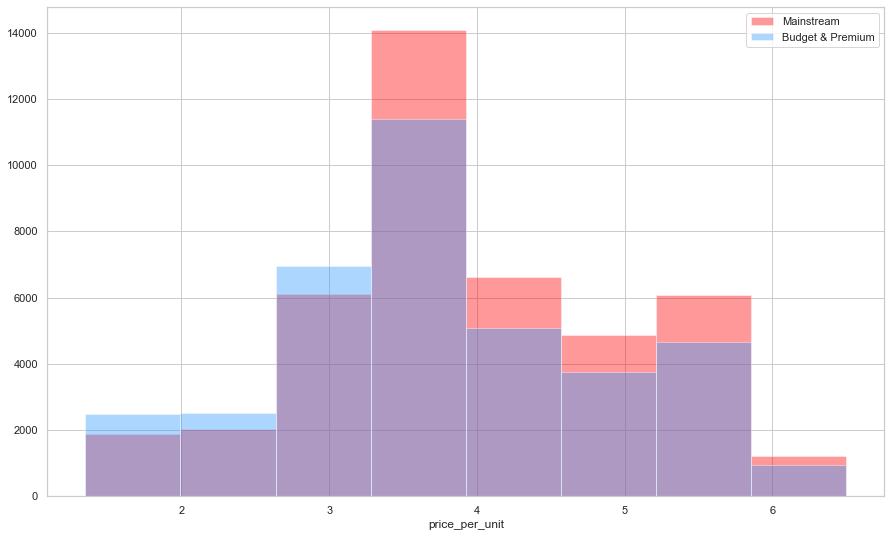

In [267]:
plt.figure(figsize=(15,9))
ax = sns.distplot(mainstream_ppu, kde=False, color="#FF0000", bins=8, label = "Mainstream")
ax1 = sns.distplot(budget_premium_ppu, kde=False, color = "#3399FF", bins=8,label = "Budget & Premium")
plt.legend()

In [243]:
ttest_ind(mainstream_ppu, budget_premium_ppu)

Ttest_indResult(statistic=22.478937900290347, pvalue=1.4720083206181396e-111)

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. 

A t score of 3 means that the groups are three times as different from each other as they are within each other.

p-value is the probability that the results from the sample data occurred by chance. We got a very low p-value which indicates that the data did not occur by chance. In this case, there is only a 1.47e-111% probability that the results from the data happened by chance.

The small p-value indicates that young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples

## Further analyze each customer segments for insights

#### find out if a specific segment tend to buy a particular brand of chips

try to target customer segments that contribute the most to sales to
retain them or further increase sales

In [268]:
complete_df.head(3)

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,price_per_unit
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.0
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2.1
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1.9


In [295]:
purchase_trend_df = pd.DataFrame(complete_df.groupby(['PREMIUM_CUSTOMER','BRAND_NAME', "LIFESTAGE"]).count()['LYLTY_CARD_NBR']).reset_index()

In [296]:
purchase_trend_df

,PREMIUM_CUSTOMER,BRAND_NAME,LIFESTAGE,LYLTY_CARD_NBR
0,Budget,burger,MIDAGE SINGLES/COUPLES,43
1,Budget,burger,NEW FAMILIES,18
2,Budget,burger,OLDER FAMILIES,159
3,Budget,burger,OLDER SINGLES/COUPLES,110
4,Budget,burger,RETIREES,66
...,...,...,...,...
415,Premium,woolworths,OLDER FAMILIES,636
416,Premium,woolworths,OLDER SINGLES/COUPLES,701
417,Premium,woolworths,RETIREES,470
418,Premium,woolworths,YOUNG FAMILIES,565


In [297]:
purchase_trend_df.nunique()

PREMIUM_CUSTOMER      3
BRAND_NAME           20
LIFESTAGE             7
LYLTY_CARD_NBR      353
dtype: int64

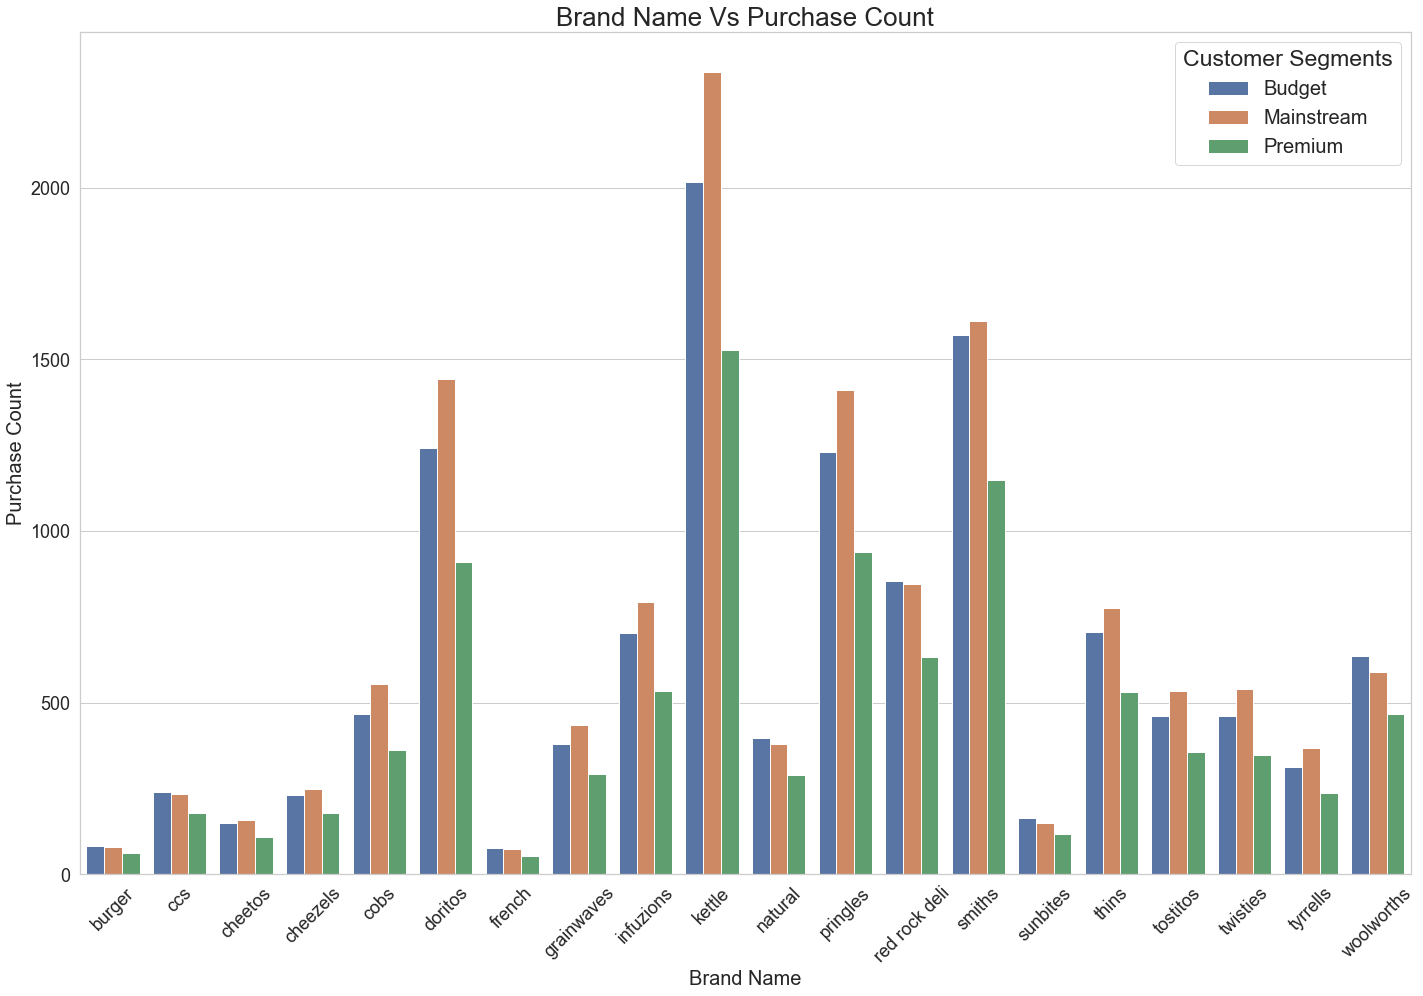

In [474]:
sns.set(style="whitegrid")
# set figure size
plt.figure(figsize=(20,14))

# create bar chart
sns.barplot(x = "BRAND_NAME",
           y = "LYLTY_CARD_NBR",
           hue= "PREMIUM_CUSTOMER",
           data = purchase_trend_df,
           ci=None)
# set x labels orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Brand Name", fontsize= 20)
plt.ylabel("purchase count".title(), fontsize=20)
plt.title("brand name vs purchase count".title(), fontsize=26)
plt.tick_params(labelsize=18)

plt.legend(title = "Customer Segments",
          loc='best',
          fontsize=20,
          title_fontsize=23)


plt.tight_layout()

# save file
plt.savefig("static/analysis_pics/BrandName_vs_PurchaseCount.png")

#### affinity (market basket) analysis
preference to a certain type of brand

* Support (Prevaluence):
    * How frequent are itemsets, or consequent and antecedent purchased together
* Condidence (Predictability):
    * given a purchase of the antecedent, how likely is a purchase of the consequent
* Lift (Interest):
    * How much more likely is this association than we would expect by chance

In [306]:
for_ttest_df

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,price_per_unit
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,2019-05-14,1,1307,348,True,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2.10
2,202,2018-11-10,1,1307,346,True,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1.90
3,203,2019-03-09,1,1307,347,True,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2,2019-05-20,1,1343,383,True,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246326,264392,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,kettle,175,2,10.8,YOUNG SINGLES/COUPLES,Premium,5.40
246327,264393,2018-08-13,272,272358,270154,74,tostitos splash of lime,tostitos,175,1,4.4,YOUNG SINGLES/COUPLES,Premium,4.40
246328,264394,2018-11-06,272,272379,270187,51,doritos mexicana,doritos,170,2,8.8,YOUNG SINGLES/COUPLES,Premium,4.40
246329,264395,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,doritos,150,2,7.8,YOUNG SINGLES/COUPLES,Premium,3.90


support = transactions involving certain brands / total transaction

In [308]:
purchase_trend_df.head(3)

,PREMIUM_CUSTOMER,BRAND_NAME,LIFESTAGE,LYLTY_CARD_NBR
0,Budget,burger,MIDAGE SINGLES/COUPLES,43
1,Budget,burger,NEW FAMILIES,18
2,Budget,burger,OLDER FAMILIES,159


In [314]:
# separate mainstream segment and (Budget and Premium) segments
mainstream_trend_df = purchase_trend_df.loc[purchase_trend_df['PREMIUM_CUSTOMER']== "Mainstream"].reset_index(drop=True)
print(mainstream_trend_df.head())
not_mainstream_trend_df = purchase_trend_df.loc[(purchase_trend_df['PREMIUM_CUSTOMER'] == "Budget")\
                                             | (purchase_trend_df['PREMIUM_CUSTOMER'] == "Premium")].reset_index(drop=True)
not_mainstream_trend_df

  PREMIUM_CUSTOMER BRAND_NAME               LIFESTAGE  LYLTY_CARD_NBR
0       Mainstream     burger  MIDAGE SINGLES/COUPLES              48
1       Mainstream     burger            NEW FAMILIES              14
2       Mainstream     burger          OLDER FAMILIES             123
3       Mainstream     burger   OLDER SINGLES/COUPLES              93
4       Mainstream     burger                RETIREES             122


,PREMIUM_CUSTOMER,BRAND_NAME,LIFESTAGE,LYLTY_CARD_NBR
0,Budget,burger,MIDAGE SINGLES/COUPLES,43
1,Budget,burger,NEW FAMILIES,18
2,Budget,burger,OLDER FAMILIES,159
3,Budget,burger,OLDER SINGLES/COUPLES,110
4,Budget,burger,RETIREES,66
...,...,...,...,...
275,Premium,woolworths,OLDER FAMILIES,636
276,Premium,woolworths,OLDER SINGLES/COUPLES,701
277,Premium,woolworths,RETIREES,470
278,Premium,woolworths,YOUNG FAMILIES,565


In [315]:
# calculate support for mainstream
mainstream_trend_df['target'] = mainstream_trend_df['LYLTY_CARD_NBR'] / mainstream_trend_df['LYLTY_CARD_NBR'].sum()

In [321]:
# group by brand
brand_group_df = pd.DataFrame(mainstream_trend_df.groupby(by='BRAND_NAME').sum()['target'])
brand_group_df.head()

,target
BRAND_NAME,
burger,0.005775
ccs,0.017189
cheetos,0.011709
cheezels,0.018221
cobs,0.040922


In [323]:
# calculate support for premium and budget
not_mainstream_trend_df['target'] =not_mainstream_trend_df['LYLTY_CARD_NBR'] / not_mainstream_trend_df['LYLTY_CARD_NBR'].sum()

In [326]:
# group by brand
not_brand_group_df = pd.DataFrame(not_mainstream_trend_df.groupby(by='BRAND_NAME').sum()['target'])
not_brand_group_df.rename(columns={"target": "non_target"}, inplace=True)
not_brand_group_df

,non_target
BRAND_NAME,
burger,0.006709
ccs,0.019281
cheetos,0.011991
cheezels,0.018845
cobs,0.038265
doritos,0.099496
french,0.006015
grainwaves,0.031008
infuzions,0.057071


In [330]:
# merge the target and none target dataframes together 
brand_supports_df = pd.merge(brand_group_df, not_brand_group_df, how='inner', left_index = True, right_index=True)

In [331]:
brand_supports_df.head()

,target,non_target
BRAND_NAME,,
burger,0.005775,0.006709
ccs,0.017189,0.019281
cheetos,0.011709,0.011991
cheezels,0.018221,0.018845
cobs,0.040922,0.038265


In [332]:
brand_supports_df['affinity_to_brand'] = brand_supports_df['target'] / brand_supports_df['non_target']


In [417]:
brand_supports_df.sort_values("affinity_to_brand", ascending=False).head()

,target,non_target,affinity_to_brand
BRAND_NAME,,,
tyrrells,0.027190,0.025409,1.070096
cobs,0.040922,0.038265,1.069429
doritos,0.106389,0.099496,1.069273
twisties,0.039763,0.037288,1.066368
kettle,0.172477,0.163758,1.053243


Mainstream customers in general are more likely to purchase chips from tyrrells compared to other brands

In [419]:
# save table in html format for use later
brand_supports_df.sort_values("affinity_to_brand", ascending=False).to_html("html_formatted_dataframes/general_affinity_to_brand.html")

#### Further Analyze young single/couples because they are one of the top contributors to total sales

We could retain them or further increase sales

In [340]:
mainstream_trend_df.head(3)

,PREMIUM_CUSTOMER,BRAND_NAME,LIFESTAGE,LYLTY_CARD_NBR,target
0,Mainstream,burger,MIDAGE SINGLES/COUPLES,48,0.000506
1,Mainstream,burger,NEW FAMILIES,14,0.000148
2,Mainstream,burger,OLDER FAMILIES,123,0.001296


In [388]:
# find out the exact lifestage label for young single couples
mainstream_trend_df['LIFESTAGE'].unique()

array(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'], dtype=object)

In [389]:
mainstream_youngcouples_df = mainstream_trend_df.drop(columns='target')

In [390]:
# select only the young singles and couples
mainstream_youngcouples_df = mainstream_youngcouples_df.loc[mainstream_youngcouples_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]

In [391]:
# find the support value for the affinity analysis
target = mainstream_youngcouples_df['LYLTY_CARD_NBR'].sum()
mainstream_youngcouples_df['target'] = mainstream_youngcouples_df['LYLTY_CARD_NBR'] / target

In [392]:
# set the brand name column as index
mainstream_youngcouples_df = pd.DataFrame(mainstream_youngcouples_df.set_index("BRAND_NAME")['target'])

In [393]:
mainstream_youngcouples_df.head()

,target
BRAND_NAME,
burger,0.003177
ccs,0.011376
cheetos,0.008506
cheezels,0.017730
cobs,0.044274


In [399]:
not_mainstream_youngcouples_df = not_mainstream_trend_df.drop(columns='target')

In [400]:
not_mainstream_youngcouples_df = not_mainstream_youngcouples_df.loc[not_mainstream_youngcouples_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]

In [401]:
target = not_mainstream_youngcouples_df['LYLTY_CARD_NBR'].sum()
not_mainstream_youngcouples_df['non_target'] = not_mainstream_youngcouples_df['LYLTY_CARD_NBR'] / target

In [402]:
# set the brand name as index and get the sum of support value
not_mainstream_youngcouples_df = pd.DataFrame(not_mainstream_youngcouples_df.groupby('BRAND_NAME').sum()['non_target'])

In [403]:
not_mainstream_youngcouples_df

,non_target
BRAND_NAME,
burger,0.008047
ccs,0.025806
cheetos,0.013736
cheezels,0.018592
cobs,0.036837
doritos,0.088172
french,0.008047
grainwaves,0.029830
infuzions,0.052931


In [405]:
youngcouple_analysis_df = pd.merge(mainstream_youngcouples_df, not_mainstream_youngcouples_df, how='inner', left_index = True, right_index = True)

In [406]:
youngcouple_analysis_df.head()

,target,non_target
BRAND_NAME,,
burger,0.003177,0.008047
ccs,0.011376,0.025806
cheetos,0.008506,0.013736
cheezels,0.017730,0.018592
cobs,0.044274,0.036837


In [408]:
youngcouple_target = youngcouple_analysis_df['target']
youngcouple_nontarget = youngcouple_analysis_df['non_target']
youngcouple_analysis_df['affinity_to_brand'] = youngcouple_target / youngcouple_nontarget

In [413]:
youngcouple_sorted_df = youngcouple_analysis_df.sort_values("affinity_to_brand", ascending = False)
youngcouple_sorted_df.head()


,target,non_target,affinity_to_brand
BRAND_NAME,,,
kettle,0.196208,0.141866,1.383051
doritos,0.121804,0.088172,1.381433
tostitos,0.045555,0.033091,1.376669
tyrrells,0.031719,0.023309,1.360810
twisties,0.046016,0.034270,1.342751


From the dataframe above, we can conclude that mainstream young singles/couples are more likely to purchase Kettle chips compared to other brands. Although the top three choices of kettle, doritos, and tostitos are closely competing.

In [415]:
# save as html table to use later
youngcouple_sorted_df.to_html("html_formatted_dataframes/youngcouple_affinity_to_brand.html")

#### Find the Affinity to pack size
Check to see which size do young singles and couples prefer

In [412]:
complete_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,202,2018-11-10,1,1307,346,96,ww original stacked chips,woolworths,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,203,2019-03-09,1,1307,347,54,ccs original,ccs,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [438]:
# target segment
mainstream_df = complete_df.loc[complete_df['PREMIUM_CUSTOMER'] == "Mainstream"]
mainstream_df = mainstream_df.groupby(['PROD_SIZE'])
mainstream_df = pd.DataFrame(mainstream_df.sum()['PROD_QTY'])
mainstream_df['target'] = mainstream_df['PROD_QTY'] / mainstream_df['PROD_QTY'].sum()
mainstream_df


,PROD_QTY,target
PROD_SIZE,,
70,988,0.005486
90,1973,0.010956
110,16990,0.094342
125,944,0.005242
134,18771,0.104232
135,2484,0.013793
150,29344,0.162942
160,1921,0.010667
165,11093,0.061597


In [436]:
# non target segment
not_mainstream_df = complete_df.loc[(complete_df['PREMIUM_CUSTOMER'] == "Premium")\
                                   | (complete_df['PREMIUM_CUSTOMER'] == "Budget")]
not_mainstream_df = not_mainstream_df.groupby(['PROD_SIZE'])
not_mainstream_df = pd.DataFrame(not_mainstream_df.sum()['PROD_QTY'])
not_mainstream_df['non_target'] = not_mainstream_df['PROD_QTY'] / not_mainstream_df['PROD_QTY'].sum()
not_mainstream_df


,PROD_QTY,non_target
PROD_SIZE,,
70,1867,0.006472
90,3719,0.012892
110,25690,0.089056
125,1786,0.006191
134,28998,0.100524
135,3700,0.012826
150,47033,0.163044
160,3683,0.012767
165,17896,0.062038


In [440]:
pack_size_df = pd.merge(pd.DataFrame(mainstream_df), 
                 pd.DataFrame(not_mainstream_df), 
                 how='inner',
                right_index = True,
                left_index=True)

In [441]:
pack_size_df.head()

,PROD_QTY_x,target,PROD_QTY_y,non_target
PROD_SIZE,,,,
70,988,0.005486,1867,0.006472
90,1973,0.010956,3719,0.012892
110,16990,0.094342,25690,0.089056
125,944,0.005242,1786,0.006191
134,18771,0.104232,28998,0.100524


In [442]:
pack_size_df['affinity_to_packsize'] = pack_size_df['target'] / pack_size_df['non_target']

In [444]:
pack_size_sorted_df = pack_size_df.sort_values(by='affinity_to_packsize', ascending=False)
pack_size_sorted_df.head()

,PROD_QTY_x,target,PROD_QTY_y,non_target,affinity_to_packsize
PROD_SIZE,,,,,
270,4815,0.026737,7129,0.024713,1.081881
135,2484,0.013793,3700,0.012826,1.075380
210,4783,0.026559,7144,0.024765,1.072435
380,4859,0.026981,7333,0.025420,1.061395
110,16990,0.094342,25690,0.089056,1.059354


In [447]:
pack_size_sorted_df.columns.values

array(['PROD_QTY_x', 'target', 'PROD_QTY_y', 'non_target',
       'affinity_to_packsize'], dtype=object)

In [450]:
pack_size_sorted_df.drop(columns=['PROD_QTY_x', 'PROD_QTY_y'], inplace=True)

In [451]:
pack_size_sorted_df.head()

,target,non_target,affinity_to_packsize
PROD_SIZE,,,
270,0.026737,0.024713,1.081881
135,0.013793,0.012826,1.075380
210,0.026559,0.024765,1.072435
380,0.026981,0.025420,1.061395
110,0.094342,0.089056,1.059354


result: mainstream young singles/couples are more likly to buy size 270g compared to other pack sizes

Next we can look at which brands offer this specific pack size which is ideal for this customer segment

In [452]:
# save as html table
pack_size_sorted_df.to_html("html_formatted_dataframes/youngcouple_affinity_to_packsize.html")

In [453]:
complete_df.columns.values

array(['index', 'DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID',
       'PROD_NBR', 'PROD_NAME', 'BRAND_NAME', 'PROD_SIZE', 'PROD_QTY',
       'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype=object)

In [455]:
packsize_270_df = complete_df.loc[complete_df['PROD_SIZE'] == 270]
packsize_270_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
31,11,2019-05-18,9,9208,8634,15,twisties cheese,twisties,270,2,9.2,MIDAGE SINGLES/COUPLES,Budget
76,789,2018-08-24,39,39167,35639,113,twisties chicken,twisties,270,2,9.2,MIDAGE SINGLES/COUPLES,Budget
122,1026,2019-05-06,54,54305,48304,15,twisties cheese,twisties,270,2,9.2,MIDAGE SINGLES/COUPLES,Budget
129,41,2019-05-20,55,55073,48887,113,twisties chicken,twisties,270,1,4.6,MIDAGE SINGLES/COUPLES,Budget
206,1514,2019-01-01,80,80182,78980,15,twisties cheese,twisties,270,2,9.2,MIDAGE SINGLES/COUPLES,Budget


In [456]:
packsize_270_df['BRAND_NAME'].unique()

array(['twisties'], dtype=object)

Twisties is the only brand that offers the 270 pack size

In [459]:
packsize_top3_df = complete_df.loc[complete_df['PROD_SIZE'].isin([270, 135, 210])]
packsize_top3_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
11,7,2019-05-16,4,4196,3539,24,grain waves sweet chilli,grainwaves,210,1,3.6,MIDAGE SINGLES/COUPLES,Budget
20,9,2018-08-18,7,7150,6900,52,grain waves sour cream&chives,grainwaves,210,2,7.2,MIDAGE SINGLES/COUPLES,Budget
31,11,2019-05-18,9,9208,8634,15,twisties cheese,twisties,270,2,9.2,MIDAGE SINGLES/COUPLES,Budget
32,382,2018-12-28,9,9208,8633,24,grain waves sweet chilli,grainwaves,210,2,7.2,MIDAGE SINGLES/COUPLES,Budget
76,789,2018-08-24,39,39167,35639,113,twisties chicken,twisties,270,2,9.2,MIDAGE SINGLES/COUPLES,Budget


In [462]:
top3_brands = ','.join(packsize_top3_df['BRAND_NAME'].unique())
print(f"The brands that sell more preferable pack sizes for young couples and singles are {top3_brands}")

The brands that sell more preferable pack sizes for young couples and singles are grainwaves,twisties,kettle


In [466]:
transaction_df.head().to_html("html_formatted_dataframes/transaction_df.html")

In [467]:
behavior_df.head().to_html("html_formatted_dataframes/customer_behavior_df.html")

## Conclusion
